In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
df = pd.read_csv('data/thecure_discography.csv')

In [3]:
df.drop(['album_uri', 'album_img', 'track_uri'], axis=1, inplace=True)

In [4]:
df.head()

,album_name,album_release_date,album_release_year,album_popularity,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity
0,Pornography,1982-05-03,1982-05-03,34,One Hundred Years - Remastered Version,0.436,0.881,G,-5.998,major,0.0439,0.001230,0.509,0.1080,0.262,132.590,401000,4,G major,33
1,Pornography,1982-05-03,1982-05-03,34,A Short Term Effect - Remastered Version,0.516,0.836,C,-5.872,major,0.0319,0.001710,0.165,0.1360,0.649,116.566,262493,4,C major,28
2,Pornography,1982-05-03,1982-05-03,34,The Hanging Garden - Remastered Version,0.420,0.889,C,-5.860,major,0.0393,0.004020,0.488,0.0795,0.634,135.421,274240,4,C major,35
3,Pornography,1982-05-03,1982-05-03,34,Siamese Twins - Remastered Version,0.772,0.523,D,-9.788,major,0.0364,0.000298,0.795,0.2820,0.752,94.194,328360,4,D major,34
4,Pornography,1982-05-03,1982-05-03,34,The Figurehead - Remastered Version,0.655,0.842,A#,-5.349,minor,0.0264,0.001250,0.642,0.1100,0.727,110.370,375173,4,A# minor,28


In [5]:
df['album_release_year'] = pd.to_datetime(df['album_release_date'], format="%Y-%m-%d")

In [6]:
df['album_release_year'] = df['album_release_year'].dt.year

In [7]:
df.drop(['album_release_date', 'album_release_year', 'key_mode'], axis=1, inplace=True)

In [8]:
df['mode'] = df['mode'].map({'minor': 0, 'major': 1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_name        223 non-null    object 
 1   album_popularity  223 non-null    int64  
 2   track_name        223 non-null    object 
 3   danceability      223 non-null    float64
 4   energy            223 non-null    float64
 5   key               223 non-null    object 
 6   loudness          223 non-null    float64
 7   mode              223 non-null    int64  
 8   speechiness       223 non-null    float64
 9   acousticness      223 non-null    float64
 10  instrumentalness  223 non-null    float64
 11  liveness          223 non-null    float64
 12  valence           223 non-null    float64
 13  tempo             223 non-null    float64
 14  duration_ms       223 non-null    int64  
 15  time_signature    223 non-null    int64  
 16  track_popularity  223 non-null    int64  
dt

# Encoding

Кодиррование категориальных переменных - важная часть будущей предикативной модели, для различных моделей хороши различные виды кодирования. Кодирование необходимо поскольку модели (в основном) умееют работать только с числовыми признаками
Основные виды кодирования категориальных признаков


- Label encoding
- One hot encoding
- Mean encoding

## Label encoding

При label encoding каждой категории в соответствие ставится свое число, данные числа равномерно упорядочены
<b>Плюсы</b>

- Сохраняет размерность данных
- Простота реализации
- Возможность задать порядок ординальных переменных

<b>Минусы</b>

- При использовании на категориальных признаках (не ординальных) вносит в данные не существующий порядок
- Расстояние между значениями категорий одинаково (не масшатбируется)

<b>Применение</b>

- Данное кодирование имеет смысл только в логических моделях (на основе деревьев решений), но часто другие виды кодирования показывают лучшие результаты

In [10]:
encoder = LabelEncoder()

In [11]:
encoder.fit(df['album_name'])

LabelEncoder()

In [12]:
df["album_name"].values

array(['Pornography', 'Pornography', 'Pornography', 'Pornography',
       'Pornography', 'Pornography', 'Pornography', 'Pornography',
       'The Top', 'The Top', 'The Top', 'The Top', 'The Top', 'The Top',
       'The Top', 'The Top', 'The Top', 'The Top', 'The Top', 'The Top',
       'The Top', 'The Top', 'The Top', 'The Top', 'The Top', 'The Top',
       'The Top', 'The Top', 'Concert - The Cure Live',
       'Concert - The Cure Live', 'Concert - The Cure Live',
       'Concert - The Cure Live', 'Concert - The Cure Live',
       'Concert - The Cure Live', 'Concert - The Cure Live',
       'Concert - The Cure Live', 'Concert - The Cure Live',
       'Concert - The Cure Live', 'The Head On The Door',
       'The Head On The Door', 'The Head On The Door',
       'The Head On The Door', 'The Head On The Door',
       'The Head On The Door', 'The Head On The Door',
       'The Head On The Door', 'The Head On The Door',
       'The Head On The Door', 'Kiss Me Kiss Me Kiss Me',
       'Kis

In [13]:
encoder.transform(df['album_name'])

array([ 9,  9,  9,  9,  9,  9,  9,  9, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,  2,  2,  2,  2,  2,  2,
        2,  2,  2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  5,  5,  5,
        5,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1])

In [14]:
encoder.classes_

array(['4:13 Dream', 'Bestival Live 2011', 'Bloodflowers',
       'Concert - The Cure Live',
       'Disintegration (Deluxe Edition [Remastered])',
       'Hypnagogic States', 'Kiss Me Kiss Me Kiss Me',
       'Mixed Up (Remastered 2018 / Deluxe Edition)', 'Paris',
       'Pornography', 'Show', 'The Cure', 'The Head On The Door',
       'The Top', 'Wild Mood Swings', 'Wish'], dtype=object)

## One Hot Encoding

Данный вид кодирования для каждой категории создает новый бинарный признак (1 - Если у строки данная категория,  - иначе), в результате создает разреженный вектор длиной равной количеству категорий, с нулями везде кроме оси текущей категории

<b>Плюсы</b>

- Не вносит не существуещего порядка в данные
- Более логичное разбиение для деревьев решений (эта категория или нет) и веса в линейных моделях
- Для метрических моделей расстояние меряется в пространстве да/нет и оно одинаково

<b>Минусы</b>

- Сильно увеличивается пространство признаков, что приводит либо к бесконечному множеству решений в линейных моделей, либо к очень долгой тренировке логических

<b>Примение</b>

- Данный вид кодирования применяется во всех моделях, при умеренном количестве категорий в признаке

In [15]:
encoder = OneHotEncoder(sparse=False)

In [16]:
df.columns

Index(['album_name', 'album_popularity', 'track_name', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'track_popularity'],
      dtype='object')

In [17]:
encoder.fit(df[['album_name', 'key']])

OneHotEncoder(sparse=False)

In [18]:
encoder.transform(df[['album_name', 'key']])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [19]:
encoder.get_feature_names()

array(['x0_4:13 Dream', 'x0_Bestival Live 2011', 'x0_Bloodflowers',
       'x0_Concert - The Cure Live',
       'x0_Disintegration (Deluxe Edition [Remastered])',
       'x0_Hypnagogic States', 'x0_Kiss Me Kiss Me Kiss Me',
       'x0_Mixed Up (Remastered 2018 / Deluxe Edition)', 'x0_Paris',
       'x0_Pornography', 'x0_Show', 'x0_The Cure',
       'x0_The Head On The Door', 'x0_The Top', 'x0_Wild Mood Swings',
       'x0_Wish', 'x1_A', 'x1_A#', 'x1_B', 'x1_C', 'x1_C#', 'x1_D',
       'x1_D#', 'x1_E', 'x1_F', 'x1_F#', 'x1_G', 'x1_G#'], dtype=object)

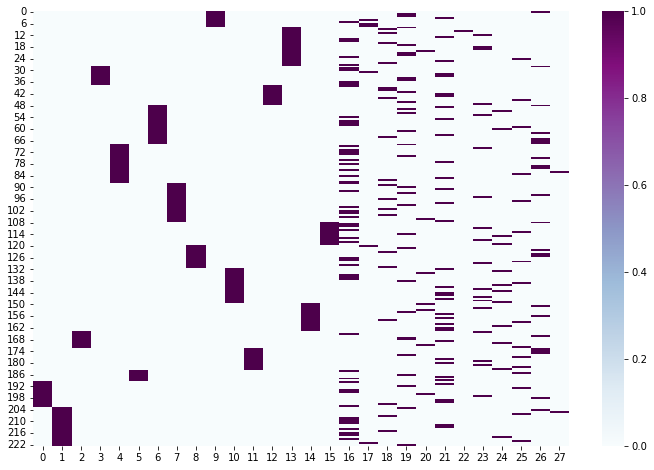

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(encoder.transform(df[['album_name', 'key']]), cmap='BuPu');

In [21]:
df_t = pd.read_csv("data/titanik.csv")

In [22]:
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


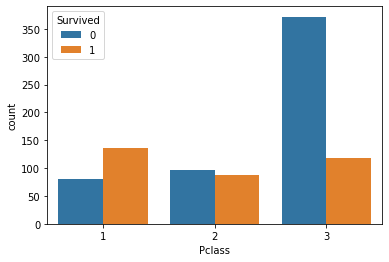

In [23]:
sns.countplot("Pclass", hue="Survived", orient="h", data=df_t);

In [24]:
df_t.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [25]:
df_t.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [26]:
df_t["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

$$\large{f(x)} = \frac{1}{|D : x \in D|}\sum{y}$$

$$\frac{\sum(y : |x \in D|) + alpha * y_{mean}}{|D : x \in D| + alpha}$$

## MeanEncoding

Кодирование средним мощный метод кодирования категориальных переменных, где в соответствие каждой переменной ставится среднее значение таргета на этой переменной

<b>Плюсы</b>

- Вносится корректный порядок следования категорий
- Пространство признаков сохраняет свою размерность
- Расстояние между категориями измеряется в статистике влияния на таргет

<b>Минусы</b>

- Высокий риск переобучения (особенно на категориях с малым количеством данных)
- Для мноклассовой классификации, каждую категорию надо кодировать на свой класс таргета (увеличивается размерность)

<b>Применение</b>

- Кодирование применяется во всех моделях с различными регуляризациями для предотвращение переобучения

In [97]:
class MeanEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, alpha=10):
        self.mapping = {}
        self.mean = 0
        self.alpha = alpha
        
    def calc_smooth_encoding(self, df):
        return (
            (df.groupby("Feature")['Target'].sum() + self.alpha * self.mean)/
            (df['Feature'].value_counts() + self.alpha)
        )
        
    def fit(self, X, y):
        self.mean = y.mean()
        for col in X.columns:
            target_df = pd.concat([X[col], pd.Series(y)], axis=1)
            target_df.columns = ["Feature", "Target"]
            self.mapping[col] = self.calc_smooth_encoding(target_df).to_dict()
        return self
    
    def transform(self, X):
        result = np.zeros((X.shape[0], len(self.mapping)), dtype=np.float32)
        for i, col in enumerate(X.columns):
            encoded = X[col].map(self.mapping[col]).fillna(self.mean)
            result[:, i] = encoded
        return result
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [28]:
encoder = MeanEncoder(alpha=10)

In [29]:
encoder.mapping

{}

In [30]:
encoder.fit(df_t[["Sex", "Pclass"]], df_t["Survived"])

MeanEncoder()

In [31]:
encoder.mapping

{'Sex': {'female': 0.7309826661678513, 'male': 0.19222893328515134},
 'Pclass': {1: 0.618753910789309,
  2: 0.4682390919504321,
  3: 0.24518639488699367}}

In [32]:
encoder.transform(df_t[["Sex", "Pclass"]])

array([[0.19222893, 0.24518639],
       [0.73098266, 0.6187539 ],
       [0.73098266, 0.24518639],
       ...,
       [0.73098266, 0.24518639],
       [0.19222893, 0.6187539 ],
       [0.19222893, 0.24518639]], dtype=float32)

$$\large{\frac{x - x_{min}}{x_{max} - x_{min}}}$$

# Scaling

Масштабирование важная часть предобработки данных для использования количественных признаков в метрических и линейных моделях. Масштабирование необходимо чтобы измежать слишком сильного влияния признака с большим масштабом значений по сравнению с другими
<b>Основные виды масштабирования</b>

- MinMaxScaler
- StandartScaler

## MinMaxScaler

## StandartScaler

In [33]:
scaler = MinMaxScaler()

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


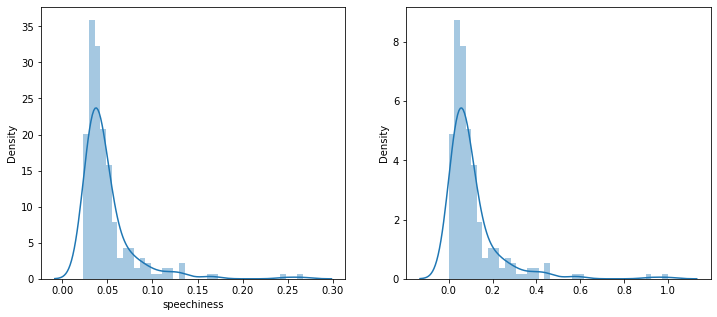

In [34]:
scaler.fit(df['speechiness'].values.reshape(-1, 1))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1);
sns.distplot(df['speechiness']);
plt.subplot(1, 2, 2);
sns.distplot(scaler.transform(df['speechiness'].values.reshape(-1, 1)).ravel());

In [35]:
scaler = StandardScaler()

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


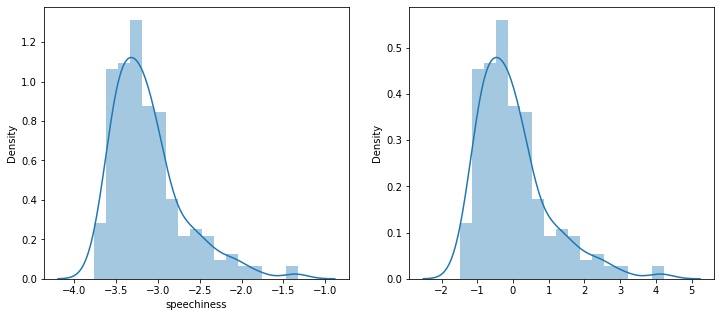

In [36]:
scaler.fit(np.log(df['speechiness']).values.reshape(-1, 1))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1);
sns.distplot(np.log(df['speechiness']));
plt.subplot(1, 2, 2);
sns.distplot(scaler.transform(np.log(df['speechiness']).values.reshape(-1, 1)).ravel());

Сложно сказать для каких моделей какой масштабирование подходит лучше, поэтому стоит попробовать оба

# Кодирование текста

# Text

Текстовые данные особый вид переменных, поскольку количество уникальных значений сопоставимо с количественными признаками, однако они не выражаются в числах
Способов кодирования текста очень много, однако мы рассмотрим только два из них

- Bag of words
- Term frequency inverse documemnt frequency

## BOW

In [37]:
# BOW
text_endoder = CountVectorizer(stop_words="english", max_df=0.3, min_df=2, ngram_range=(1, 3))

In [38]:
df['track_name'] = df['track_name'].str.replace(r'\W+', ' ').str.strip().str.lower()

/tmp/ipykernel_12108/602786422.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['track_name'] = df['track_name'].str.replace(r'\W+', ' ').str.strip().str.lower()


## TfIdf

В подходе tfidf вместо 1 на месте токена, мы ставим его tfidf, TfIdf - это аббревиатура из двух частей Tf и Idf
- Tf- term frequency частота слова в данном тексте деленная на количество слов в тексте
- Idf - inverse document frequency общее количество документов деленое на количество документов где встречается данное слово, обычно берут десятичный логарифм от этого значения
$$\large{TfIdf = \frac{n_t}{\sum_k{n_w}}\log_{10}{\frac{|D|}{|D:W\in D|}}}$$

In [41]:
text_endoder = TfidfVectorizer(stop_words="english", max_df=0.3, min_df=2, ngram_range=(1, 3), norm='l1')

# Metrics

Метрики - это показатель качества, насколько хорошо наша модель решает ту или иную задачу. Выбор правильной метрики для задачи, является важной частью модели. Основные метрики:
<b>Классификация</b>

- Accuracy
- Roc auc
- f1 score
- logloss

<b>Регрессия</b>

- MSE
- RMSE
- R2
- MAE
- MSLE

## Classification

### Accuracy

Выберем лучший классификатор для нашей задачи, на основе метрики accuracy
Accuracy - это доля правильных ответов классификатора

In [54]:
class Idomp(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        return X

In [55]:
real_cols = [
    'album_popularity', 'danceability', 'energy', 'loudness', 
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
    'valence', 'tempo', 'duration_ms', 'time_signature', 'track_popularity'
]

In [44]:
tree_df_label = df.copy()

In [98]:
ct = ColumnTransformer([
    ("real", Idomp(), real_cols),
    ("text", CountVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.5), "track_name"),
    ("categorical", MeanEncoder(alpha=1000), ["album_name", "key"])
])

In [99]:
pipeline = Pipeline([
     ("transofrm", ct),
     ('clf', DecisionTreeClassifier(max_depth=5, random_state=42))
])

In [100]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [101]:
predict = cross_val_predict(pipeline, X=df, y=df['mode'], cv=cv, method='predict')

In [102]:
confusion_matrix(df["mode"], predict, labels=[0, 1])

array([[54, 36],
       [41, 92]])

Мы получили точность 55%, что интуитивно лучше случайного выбора. Однако если мы посмотрим на распределение классов в данных, то увидим что если бы мы всегда предсказывали 1 - accuracy была бы 59%

In [103]:
accuracy_score(df['mode'], predict)

0.6547085201793722

In [104]:
df['mode'].value_counts()

1    133
0     90
Name: mode, dtype: int64

In [105]:
accuracy_score(df['mode'], [1] * df.shape[0])

0.5964125560538116

In [106]:
pipeline = Pipeline([
     ("transofrm", ct),
     ('clf', DecisionTreeClassifier(max_depth=5, random_state=42))
])

In [109]:
predict = cross_val_predict(pipeline, X=df, y=df['mode'], cv=cv, method='predict_proba')[:, 1]

In [110]:
accuracy_score(df['mode'], predict > 0.5)

0.57847533632287

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


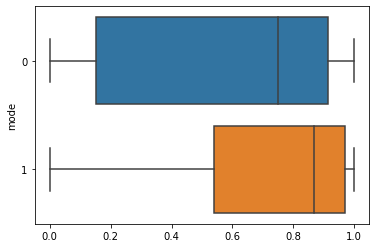

In [117]:
sns.boxplot(predict, df["mode"], orient="h");

In [121]:
roc_auc_score(df["mode"], predict)

0.5662907268170426

In [119]:
score = []
for i in np.linspace(0, 1, 11):
    s = accuracy_score(df['mode'], predict > i)
    score.append((i, s))

In [122]:
f1_score(df["mode"], predict > 0.5)

0.6802721088435374

<b>Плюсы accuracy</b>

- Интерпретируемость, при равных долях классов

<b>Минусы accuracy</b>

- При большом дисбалансе классов, не видно улучшения модели
- Не оптимизируется напрямую

### Roc auc

Метрика Roc-auc часто описывается как площадь под кривой ошибок, взглянем на нее поближе.
Чтобы построить roc auc необходимо ввести понятия TPR (true positive rate) и FPR (false positive rate)
<b>True positive rate</b> - количество корректно определенных меток положительно класса, т.е. количество корректно определенных положительных меток на общее количество положительных меток в данных
<b>False positive rate</b> - количество некорректно определенных меток отрицательного класса, т.е. количество некорректно определенных положительных меток на общее количество отрицательных меток
Очевидно что при разных процентах определения границы положительного/отрицательного класса, метрики будут изменятся

график взаимного изменения TPR и FPR называется ROC кривая

Площадь под данным графиком и есть метрика ROC AUC
Основной baseline для roc auc это 0.5 что соответствует случайным предсказаниям

Однако ROC AUC еще можно интерпритировать как долю корректно отсортированных пар меток и данная интерпритация показывает качество классификации независимо от выбора границы разделения классов

### F1

F1 score это метрика балансирующая точность на метках определения различных классов и равна среднему гармоническому между recall и precision

$\large{F1 = \frac{2 * precision * recall}{precision + recall}}$

<b>Precision</b> - количество корректно определенных меток положительного класса, среди всех предсказаний положительного класса
<b>Recall</b> - по факту тоже самое что и true positive rate

## Regression

In [ ]:
number_cols = number_cols[:-1]

In [ ]:
best_pipeline = pipeline = Pipeline(
    [('features', FeatureUnion(
        [
        ('album_name', make_pipeline(ColumnsSelector(['album_name']), OneHotEncoder(handle_unknown='ignore'))),
        ('key', make_pipeline(ColumnsSelector(['key']), OneHotEncoder(handle_unknown='ignore'))),
        ('text', make_pipeline(ColumnsSelector('track_name', reshape=True), 
                               CountVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.5))),
        ('number_features', ColumnsSelector(number_cols)),
        ])), 
     ('clf', DecisionTreeRegressor(max_depth=5, random_state=42))
])

In [ ]:
predict = cross_val_predict(best_pipeline, X=df, y=df['track_popularity'], cv=cv, method='predict')

In [ ]:
df['track_popularity'].mean()

### MSE

Mean squared error - среднее квадратов ошибок на таргете, данная метрика часто является так же и тем функционалом который оптимизируется при решении задач, с этим и связана ее популярность

$\large{MSE = \frac{1}{N}\sum_{i=1}^{N}{(y_{i}^{pred} - y_{i}^{true})^2}}$

In [ ]:
mean_squared_error(df['track_popularity'], predict)

Основная проблема MSE в том что она плохо интепретируется, поскольку это квадрат ошибки и имеет иной масштаб чем таргет
Чтобы превести ошибку в такую же шкалу как и наш таргет используют RMSE - который является просто корнем из MSE
$\large{RMSE = \sqrt{MSE}}$

In [ ]:
np.sqrt(mean_squared_error(df['track_popularity'], predict))

In [ ]:
idx = np.argsort((df['track_popularity'].values - predict))

In [ ]:
plt.plot((df['track_popularity'].values - predict)[idx], ((df['track_popularity'].values - predict)**2)[idx]);

Как видно на графике вклад в MSE растет сильно быстрее чем сама ошибка, поэтому при оптимизации MSE мы стремимся убрать количество ошибочно определенных величин с большими значениями, вместо оптимизации в среднем

### MAE

MAE - это среднее абсолютной ошибки на данных, в отличии от MSE, МAE не оптимизируется напрямую, однако из-за того что MAE убирает квадратичную разницу, при его оптимизации мы будем оптимизировать функционал в среднем
$\large{MAE = \frac{1}{N}\sum_{i=1}^{N}{|y_{i}^{pred} - y_{i}^{true}|}}$

In [ ]:
mean_absolute_error(df['track_popularity'], predict)

In [ ]:
plt.plot((df['track_popularity'].values - predict)[idx], np.abs(df['track_popularity'].values - predict)[idx]);

<b>Baseline MSE</b> - среднее таргета
<b>Baseline MAE</b> - медиана таргета
MAE - метрика гораздо более устойчивая к выбросам

### R2

R2 - метрика которая показывает долю объясненной дисперсии модели
Это хорошо тем что R2 устойчив к масштабу таргета, в отличии от MSE и MAE для которых 10 является хорошим показателем если среднее таргета 1000 и плохим если среднее 2
$\large{R2 = 1 - \frac{MSE}{\frac{1}{N}\sum_{i=1}^{N}{(y^{mean} - y_{i}^{true})^2}}}$

In [ ]:
r2_score(df['track_popularity'], predict)

### MSLE

Еще одним способом убрать большое влияние выбросов на метрику является MSLE
MSLE - это средний квадрат ошибок логарифмов предсказаний и таргета

$\large{MSLE = \frac{1}{N}\sum_{i=1}^{N}{(\log{y_{i}^{pred}} - \log{y_{i}^{true}})^2}}$

In [ ]:
mean_squared_log_error(df['track_popularity'], predict)